In [1]:
# imports
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# EXAMPLE 5 ESTIMATING THE HEIGHT OF A BUILDING

## Predicting the hidden state of a system with a static dynamic model with a specific kalman filter without process noise

Predict the height of a building over repeated measurements with an imprecise altimeter

![building](../images/ex5_building.png)
![kf](../images/DetailedKalmanFilterAlgorithm.png)

## State Extrapolation/Prediction Equation

$\hat{x}_{n+1,n}=\hat{x}_{n,n}$

$p_{n+1,n}=p_{n,n}$

## State Update Equation

$\hat{x}_{n,n}=\hat{x}_{n,n-1} + K_{n}(z_{n} - \hat{x}_{n,n-1})$

$p_{n,n}=(1 - K_{n})p_{n,n-1}$

$K_{n} = \frac{{p}_{n,n-1}}{{p}_{n,n-1} + {r}_{n}}$

## System represented by a Building

The system is modelled by a static dynamic equation since its height doesn't change over time. The true height is 50 meters. The altimeter measurement error (standard deviation) is 5 meters.

A human estimation error (standard deviation) is about 15 meters: $\sigma=15$ and $p_{0,0}=\sigma^{2}=225$


In [17]:
# true height
x_true = 50

# state prediction equation
state_pred_height = lambda x: x
state_pred_height_var = lambda p: p

# state update equation
kalman_gain = lambda p,r: p / (p + r)
state_update_height = lambda x,z,k: x + k * (z - x)
state_update_height_var = lambda p,k: (1 - k) * p

nt = 50  # num of measurements
r = 5**2  # measurement uncertainty
x_init = 60
p_init = 225

In [18]:
x_measures = [np.random.normal(x_true, np.sqrt(r)) for _ in range(nt)]
x_trues = [x_true] * nt
# initial pred is the initial guess
x_estimations = [x_init]
p_estimations = [p_init]
kg_list = []

x_n_minus_one = x_init
p_n_minus_one = p_init
for n in range(1, nt):  # at 0th step we use the initial guess
    kg = kalman_gain(p_n_minus_one, r)
    kg_list.append(kg)
    x_est = state_update_height(x_n_minus_one, x_measures[n], kg)
    p_est = state_update_height_var(p_n_minus_one, kg)
    x_n_plus_one = state_pred_height(x_est)
    p_n_plus_one = state_pred_height_var(p_est)

    x_estimations.append(x_est)
    p_estimations.append(p_est)
    
    x_n_minus_one = x_n_plus_one
    p_n_minus_one = p_n_plus_one

In [19]:
# remove the first initial guess before graphing
nt -= 1
x_measures, x_trues, x_estimations, p_estimations = x_measures[1:], x_trues[1:],  x_estimations[1:],  p_estimations[1:]

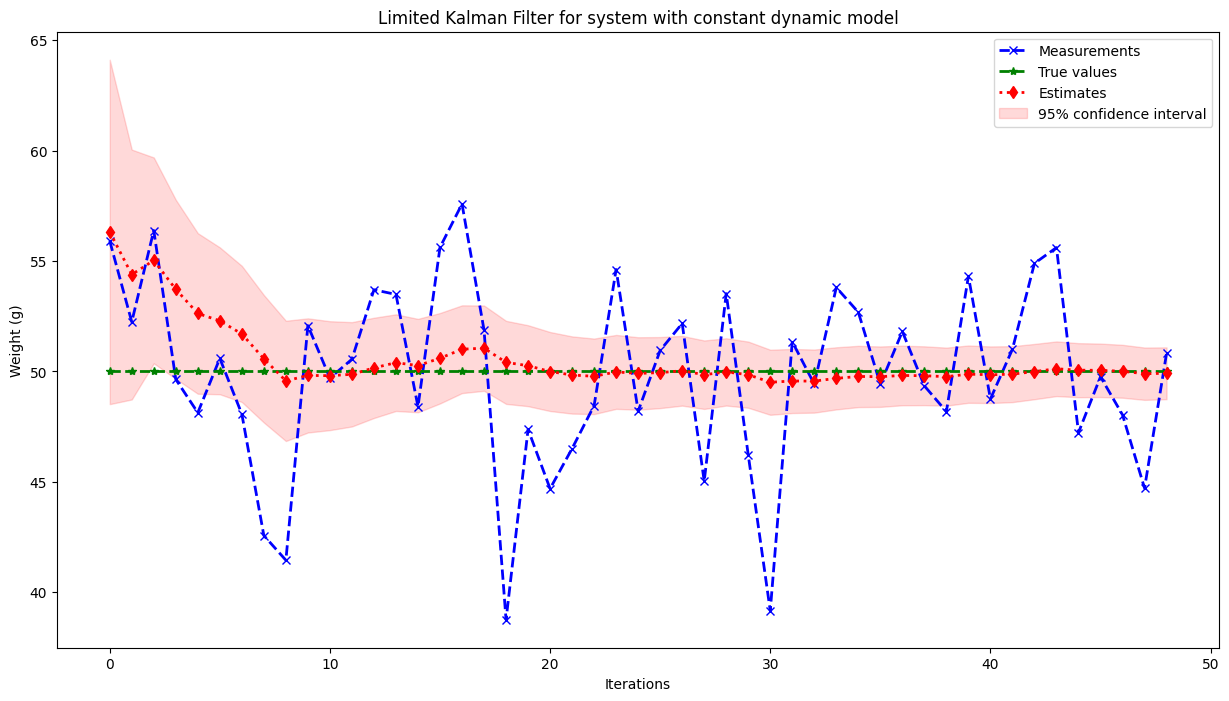

In [20]:
plt.figure(figsize=(15, 8))

plt.title(label="Limited Kalman Filter for system with constant dynamic model")
plt.plot(x_measures, color='blue', marker='x', linestyle='dashed', linewidth=2, label="Measurements")
plt.plot(x_trues, color='green', marker='*', linestyle='--', linewidth=2, label="True values")
plt.plot(x_estimations, color='red', marker='d', linestyle='dotted', linewidth=2, label="Estimates")

x_est_lower = [norm.ppf(0.05, mu, np.sqrt(p_estimations[i])) for i,mu in enumerate(x_estimations)]
x_est_higher = [norm.ppf(0.95, mu, np.sqrt(p_estimations[i])) for i,mu in enumerate(x_estimations)]
plt.fill_between(range(nt), x_est_lower, x_est_higher, color='red', alpha=0.15, label="95% confidence interval")

plt.xlabel("Iterations")
plt.ylabel("Weight (g)")
plt.legend()
plt.show()

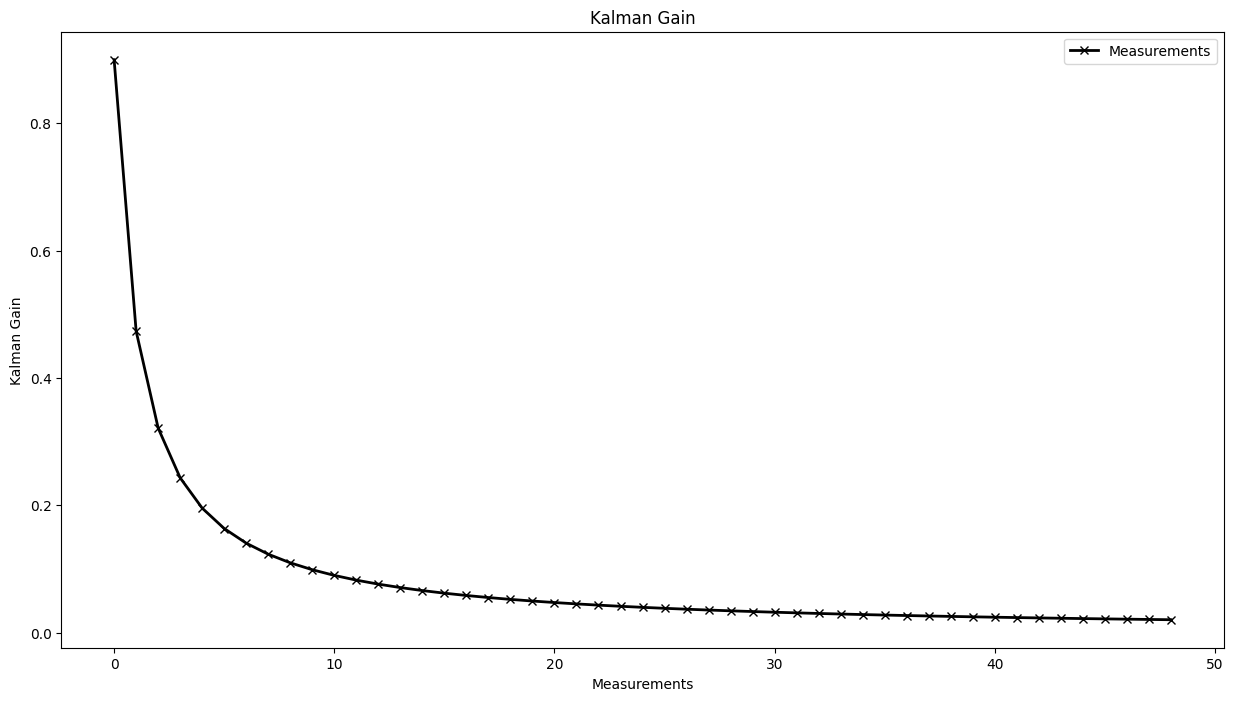

In [6]:
plt.figure(figsize=(15, 8))

plt.title(label="Kalman Gain")
plt.plot(kg_list, color='black', marker='x', linewidth=2, label="Measurements")

plt.xlabel("Measurements")
plt.ylabel("Kalman Gain")
plt.legend()
plt.show()

# EXAMPLE 6 ESTIMATING THE TEMPERATURE OF THE LIQUID IN A TANK

## Predicting the hidden state of a system with a static dynamic model with a specific kalman filter with system/process noise

Predict the temperature of a liquid in a tank over repeated measurements

## State Extrapolation/Prediction Equation

$\hat{x}_{n+1,n}=\hat{x}_{n,n}$

$p_{n+1,n}=p_{n,n} + q_{n}$

## State Update Equation

$\hat{x}_{n,n}=\hat{x}_{n,n-1} + K_{n}(z_{n} - \hat{x}_{n,n-1})$

$p_{n,n}=(1 - K_{n})p_{n,n-1}$

$K_{n} = \frac{{p}_{n,n-1}}{{p}_{n,n-1} + {r}_{n}}$

## System represented by the liquid

The system is modelled by a static dynamic equation since its temperature doesn't change drastically but fluctuates over time due to the random motion of liquid particles. 

We assume that the model is accurate. Thus we set the process noise variance (q) to 0.0001.

The true temperature is 50C. The measurement error (standard deviation) is 0.1 degrees Celsius.
A human estimation error (standard deviation) is about 15 meters: $\sigma=0.1$ and $p_{0,0}=\sigma^{2}=0.01$

Our guess is imprecise, so we set our initialization estimate error $\sigma$ to 100. The Estimate Variance of the initialization is the error variance ($\sigma^{2} = p_{0,0}$) = 10000

In [21]:
# true temperature
x_true = 50

# state prediction equation
state_pred_temp = lambda x: x
state_pred_temp_var = lambda p,q: p + q

# state update equation
kalman_gain = lambda p,r: p / (p + r)
state_update_temp = lambda x,z,k: x + k * (z - x)
state_update_temp_var = lambda p,k: (1 - k) * p

q = 0.0001
nt = 50  # num of measurements
r = 0.1**2  # measurement uncertainty
p_init = 10000

In [22]:
x_measures = [np.random.normal(x_true, np.sqrt(r)) for _ in range(nt)]
x_trues = [x_true] * nt
# initial pred is the initial guess
x_init = x_measures[0]
x_estimations = [x_init]
p_estimations = [p_init]
kg_list = []

x_n_minus_one = x_init
p_n_minus_one = p_init
for n in range(1, nt):  # at 0th step we use the initial guess
    kg = kalman_gain(p_n_minus_one, r)
    kg_list.append(kg)
    x_est = state_update_temp(x_n_minus_one, x_measures[n], kg)
    p_est = state_update_temp_var(p_n_minus_one, kg)
    x_n_plus_one = state_pred_temp(x_est)
    p_n_plus_one = state_pred_temp_var(p_est, q)

    x_estimations.append(x_est)
    p_estimations.append(p_est)
    
    x_n_minus_one = x_n_plus_one
    p_n_minus_one = p_n_plus_one

In [23]:
# remove the first initial guess before graphing
nt -= 1
x_measures, x_trues, x_estimations, p_estimations = x_measures[1:], x_trues[1:],  x_estimations[1:],  p_estimations[1:]

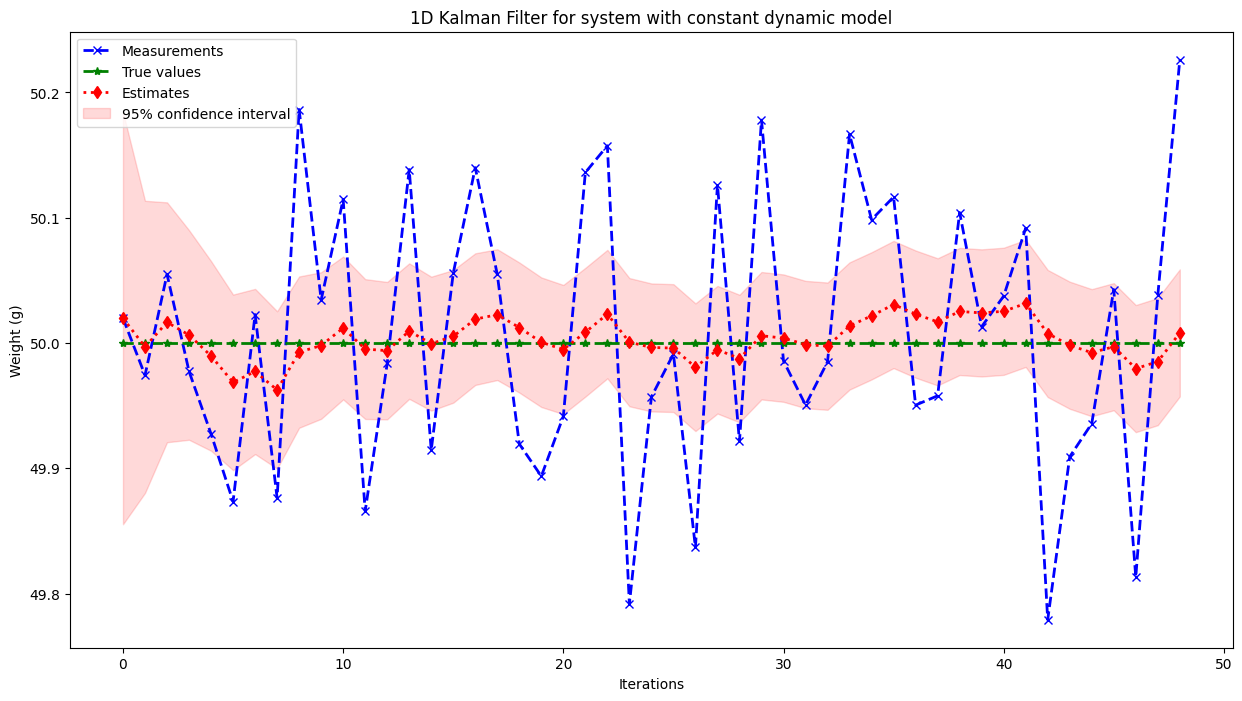

In [25]:
plt.figure(figsize=(15, 8))

plt.title(label="1D Kalman Filter for system with constant dynamic model")
plt.plot(x_measures, color='blue', marker='x', linestyle='dashed', linewidth=2, label="Measurements")
plt.plot(x_trues, color='green', marker='*', linestyle='--', linewidth=2, label="True values")
plt.plot(x_estimations, color='red', marker='d', linestyle='dotted', linewidth=2, label="Estimates")

x_est_lower = [norm.ppf(0.05, mu, np.sqrt(p_estimations[i])) for i,mu in enumerate(x_estimations)]
x_est_higher = [norm.ppf(0.95, mu, np.sqrt(p_estimations[i])) for i,mu in enumerate(x_estimations)]
plt.fill_between(range(nt), x_est_lower, x_est_higher, color='red', alpha=0.15, label="95% confidence interval")

plt.xlabel("Iterations")
plt.ylabel("Weight (g)")
plt.legend()
plt.show()

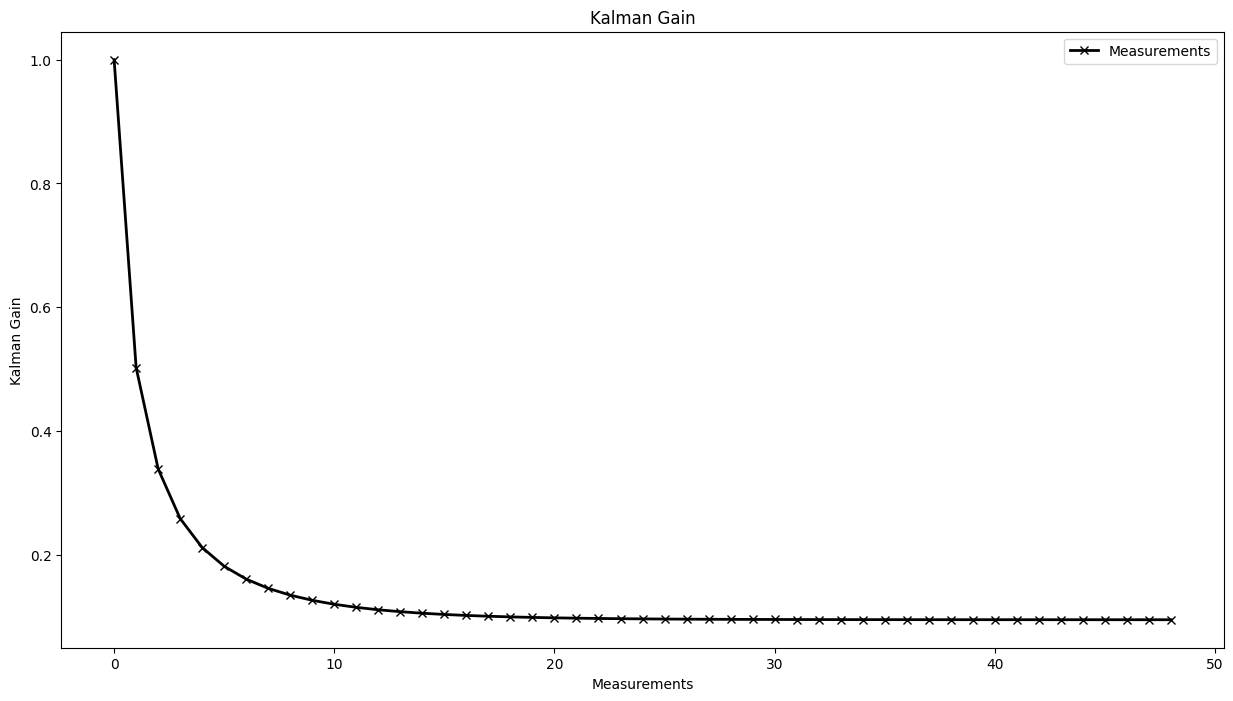

In [23]:
plt.figure(figsize=(15, 8))

plt.title(label="Kalman Gain")
plt.plot(kg_list, color='black', marker='x', linewidth=2, label="Measurements")

plt.xlabel("Measurements")
plt.ylabel("Kalman Gain")
plt.legend()
plt.show()

# EXAMPLE 7 ESTIMATING THE TEMPERATURE OF A HEATING LIQUID Ⅰ

## Predicting the hidden state of a system with a static dynamic model with a kalman filter without process noise

## State Extrapolation/Prediction Equation

$\hat{x}_{n+1,n}=\hat{x}_{n,n}$

$p_{n+1,n}=p_{n,n} + q_{n}$

## State Update Equation

$\hat{x}_{n,n}=\hat{x}_{n,n-1} + K_{n}(z_{n} - \hat{x}_{n,n-1})$

$p_{n,n}=(1 - K_{n})p_{n,n-1}$

$K_{n} = \frac{{p}_{n,n-1}}{{p}_{n,n-1} + {r}_{n}}$

## System represented by the liquid

The system is modelled by a static dynamic equation even though its temperature increases over time (0.5C after every measurement). 

We assume that the model is accurate. Thus we set the process noise variance (q) to 0.0001.

The initial temperature is 50C. The measurement error (standard deviation) is 0.1 degree Celsius.
The measurement error (standard deviation) is about 0.1 degree Celsius: $\sigma=0.1$ and $p_{0,0}=\sigma^{2}=0.01$

Our guess is imprecise, so we set our initialization estimate error $\sigma$ to 100. The Estimate Variance of the initialization is the error variance ($\sigma^{2} = p_{0,0}$) = 10000

In [28]:
# true temperature
x_true = 50

# state prediction equation
state_pred_temp = lambda x: x
state_pred_temp_var = lambda p,q: p + q

# state update equation
kalman_gain = lambda p,r: p / (p + r)
state_update_temp = lambda x,z,k: x + k * (z - x)
state_update_temp_var = lambda p,k: (1 - k) * p

q = 0.0001
nt = 50  # num of measurements
r = 0.1**2  # measurement uncertainty
p_init = 10000

In [30]:
x_trues = [50 + (i * 0.5) for i in range(nt)]
x_measures = [np.random.normal(x_trues[i], np.sqrt(r)) for i in range(nt)]
# initial pred is the initial guess
x_init = x_measures[0]
x_estimations = [x_init]
p_estimations = [p_init]
kg_list = []

x_n_minus_one = x_init
p_n_minus_one = p_init
for n in range(1, nt):  # at 0th step we use the initial guess
    kg = kalman_gain(p_n_minus_one, r)
    kg_list.append(kg)
    x_est = state_update_temp(x_n_minus_one, x_measures[n], kg)
    p_est = state_update_temp_var(p_n_minus_one, kg)
    x_n_plus_one = state_pred_temp(x_est)
    p_n_plus_one = state_pred_temp_var(p_est, q)

    x_estimations.append(x_est)
    p_estimations.append(p_est)
    
    x_n_minus_one = x_n_plus_one
    p_n_minus_one = p_n_plus_one

In [31]:
# remove the first initial guess before graphing
nt -= 1
x_measures, x_trues, x_estimations, p_estimations = x_measures[1:], x_trues[1:],  x_estimations[1:],  p_estimations[1:]

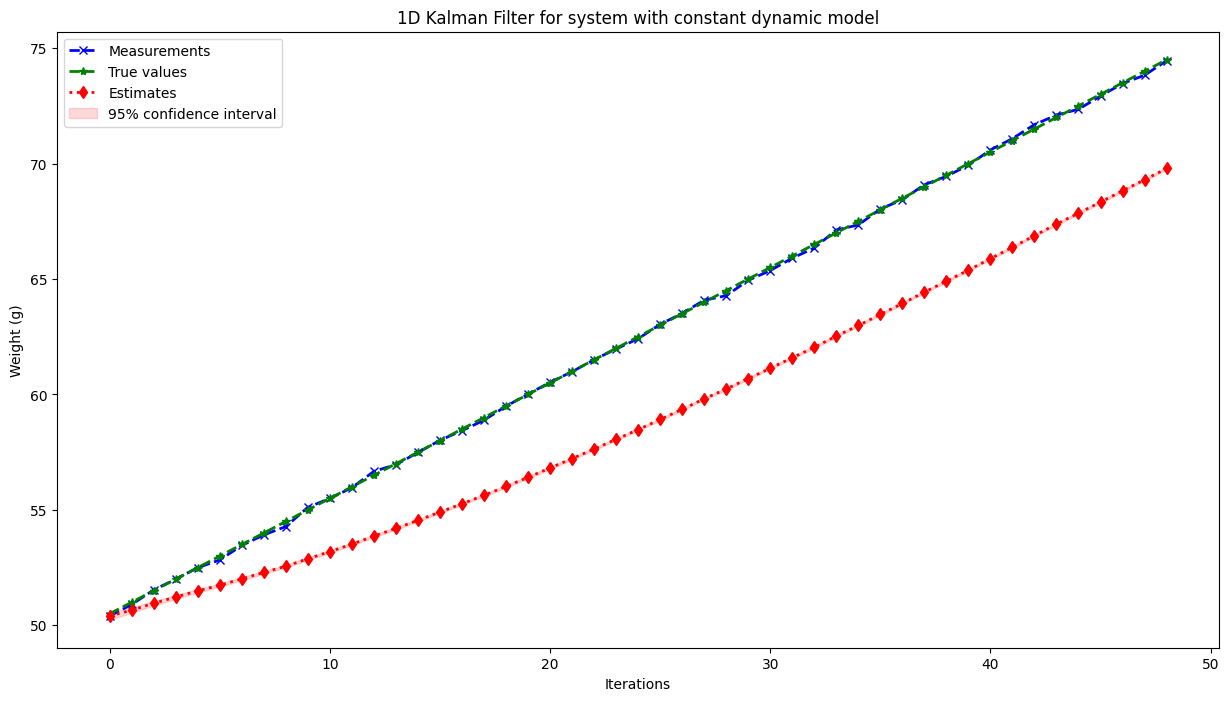

In [32]:
plt.figure(figsize=(15, 8))

plt.title(label="1D Kalman Filter for system with constant dynamic model")
plt.plot(x_measures, color='blue', marker='x', linestyle='dashed', linewidth=2, label="Measurements")
plt.plot(x_trues, color='green', marker='*', linestyle='--', linewidth=2, label="True values")
plt.plot(x_estimations, color='red', marker='d', linestyle='dotted', linewidth=2, label="Estimates")

x_est_lower = [norm.ppf(0.05, mu, np.sqrt(p_estimations[i])) for i,mu in enumerate(x_estimations)]
x_est_higher = [norm.ppf(0.95, mu, np.sqrt(p_estimations[i])) for i,mu in enumerate(x_estimations)]
plt.fill_between(range(nt), x_est_lower, x_est_higher, color='red', alpha=0.15, label="95% confidence interval")

plt.xlabel("Iterations")
plt.ylabel("Weight (g)")
plt.legend()
plt.show()

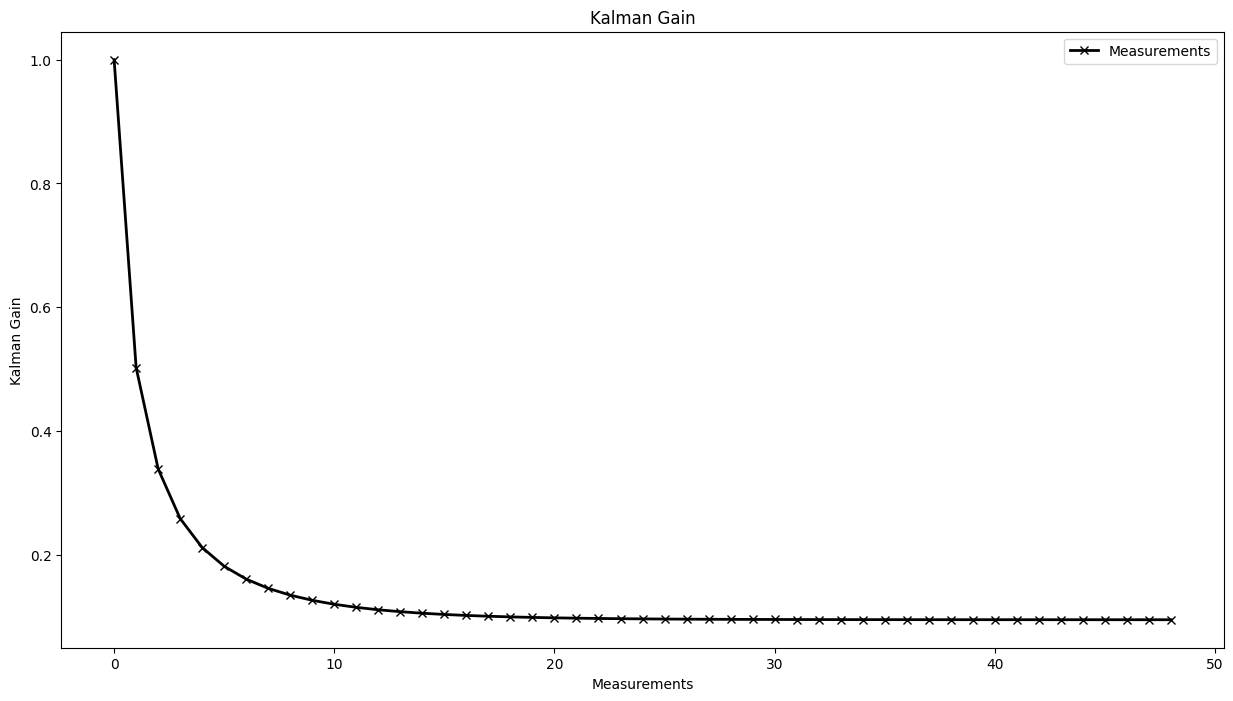

In [33]:
plt.figure(figsize=(15, 8))

plt.title(label="Kalman Gain")
plt.plot(kg_list, color='black', marker='x', linewidth=2, label="Measurements")

plt.xlabel("Measurements")
plt.ylabel("Kalman Gain")
plt.legend()
plt.show()

# EXAMPLE 8 ESTIMATING THE TEMPERATURE OF A HEATING LIQUID ⅠI

## Predicting the hidden state of a system with a static dynamic model with a specific kalman filter without process noise

## State Extrapolation/Prediction Equation

$\hat{x}_{n+1,n}=\hat{x}_{n,n}$

$p_{n+1,n}=p_{n,n} + q_{n}$

## State Update Equation

$\hat{x}_{n,n}=\hat{x}_{n,n-1} + K_{n}(z_{n} - \hat{x}_{n,n-1})$

$p_{n,n}=(1 - K_{n})p_{n,n-1}$

$K_{n} = \frac{{p}_{n,n-1}}{{p}_{n,n-1} + {r}_{n}}$

## System represented by the liquid

The system is modelled by a static dynamic equation even though its temperature increases over time (0.5C after every measurement). 

We assume that the model is accurate. Thus we set the process noise variance (q) to 0.0001.

The initial temperature is 50C. The measurement error (standard deviation) is 0.1 degree Celsius.
The measurement error (standard deviation) is about 0.1 degree Celsius: $\sigma=0.1$ and $p_{0,0}=\sigma^{2}=0.01$

Our guess is imprecise, so we set our initialization estimate error $\sigma$ to 100. The Estimate Variance of the initialization is the error variance ($\sigma^{2} = p_{0,0}$) = 10000

In [35]:
# true temperature
x_true = 50

# state prediction equation
state_pred_temp = lambda x: x
state_pred_temp_var = lambda p,q: p + q

# state update equation
kalman_gain = lambda p,r: p / (p + r)
state_update_temp = lambda x,z,k: x + k * (z - x)
state_update_temp_var = lambda p,k: (1 - k) * p

# Since our process is not well-defined, we increase the process variance (q) from 0.0001 to 0.15.
q = 0.15
nt = 50  # num of measurements
r = 0.1**2  # measurement uncertainty
p_init = 10000

In [36]:
x_trues = [50 + (i * 0.5) for i in range(nt)]
x_measures = [np.random.normal(x_trues[i], np.sqrt(r)) for i in range(nt)]
# initial pred is the initial guess
x_init = x_measures[0]
x_estimations = [x_init]
p_estimations = [p_init]
kg_list = []

x_n_minus_one = x_init
p_n_minus_one = p_init
for n in range(1, nt):  # at 0th step we use the initial guess
    kg = kalman_gain(p_n_minus_one, r)
    kg_list.append(kg)
    x_est = state_update_temp(x_n_minus_one, x_measures[n], kg)
    p_est = state_update_temp_var(p_n_minus_one, kg)
    x_n_plus_one = state_pred_temp(x_est)
    p_n_plus_one = state_pred_temp_var(p_est, q)

    x_estimations.append(x_est)
    p_estimations.append(p_est)
    
    x_n_minus_one = x_n_plus_one
    p_n_minus_one = p_n_plus_one

In [37]:
# remove the first initial guess before graphing
nt -= 1
x_measures, x_trues, x_estimations, p_estimations = x_measures[1:], x_trues[1:],  x_estimations[1:],  p_estimations[1:]

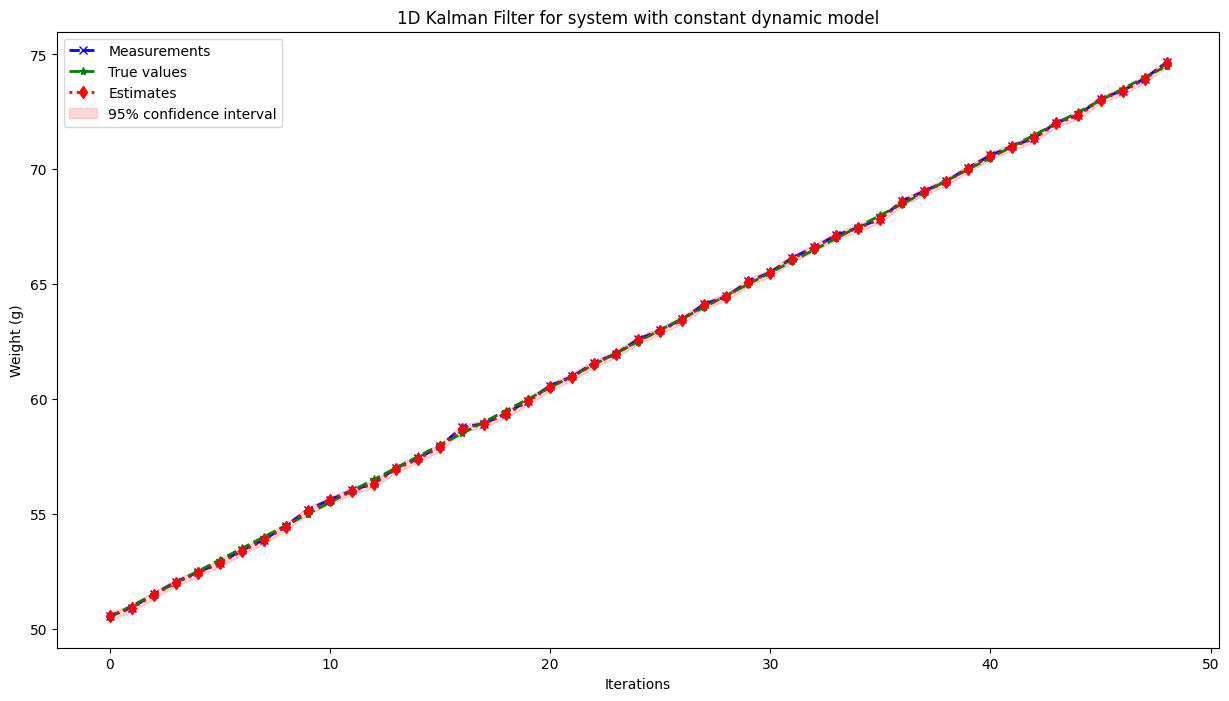

In [38]:
plt.figure(figsize=(15, 8))

plt.title(label="1D Kalman Filter for system with constant dynamic model")
plt.plot(x_measures, color='blue', marker='x', linestyle='dashed', linewidth=2, label="Measurements")
plt.plot(x_trues, color='green', marker='*', linestyle='--', linewidth=2, label="True values")
plt.plot(x_estimations, color='red', marker='d', linestyle='dotted', linewidth=2, label="Estimates")

x_est_lower = [norm.ppf(0.05, mu, np.sqrt(p_estimations[i])) for i,mu in enumerate(x_estimations)]
x_est_higher = [norm.ppf(0.95, mu, np.sqrt(p_estimations[i])) for i,mu in enumerate(x_estimations)]
plt.fill_between(range(nt), x_est_lower, x_est_higher, color='red', alpha=0.15, label="95% confidence interval")

plt.xlabel("Iterations")
plt.ylabel("Weight (g)")
plt.legend()
plt.show()

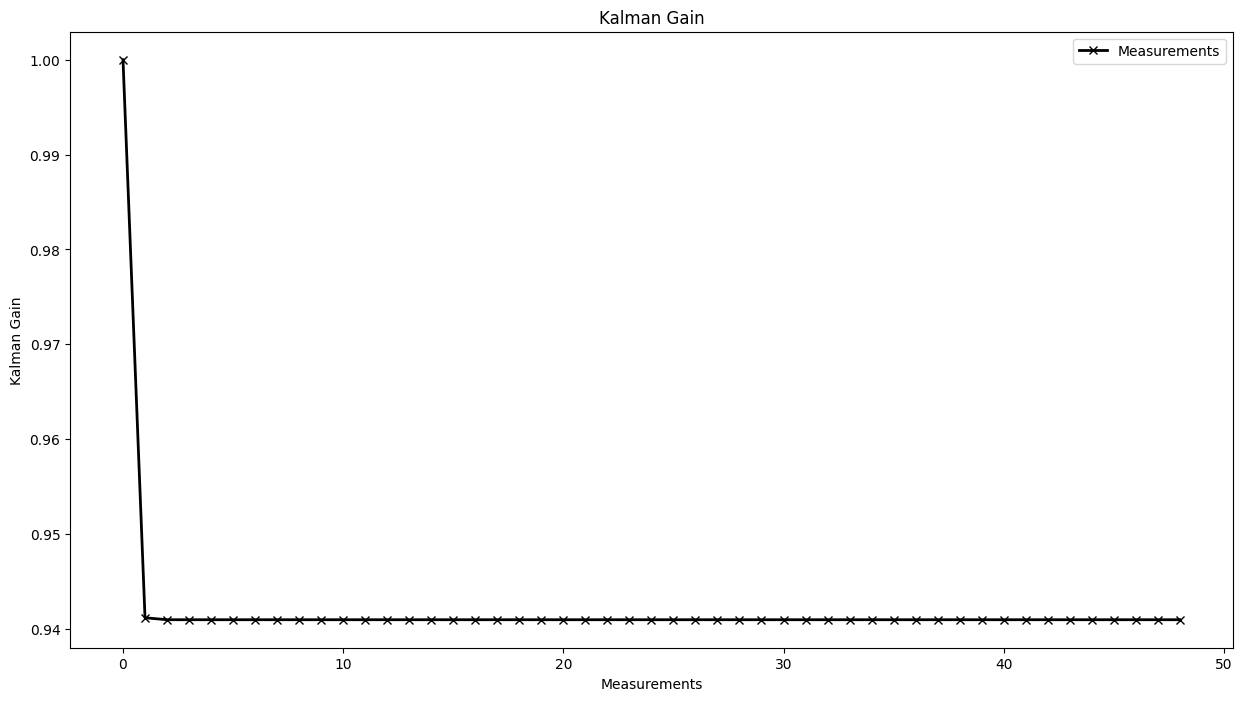

In [39]:
plt.figure(figsize=(15, 8))

plt.title(label="Kalman Gain")
plt.plot(kg_list, color='black', marker='x', linewidth=2, label="Measurements")

plt.xlabel("Measurements")
plt.ylabel("Kalman Gain")
plt.legend()
plt.show()